In [1]:
# importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# load dataset
df = pd.read_csv('CC GENERAL.csv')
df = df.drop('CUST_ID' , axis = 1)

In [3]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [6]:
print('Number of customers:',df.shape[0])
print('Number of features:',len(df.columns))

Number of customers: 8950
Number of features: 17


In [8]:
print(df.isna().sum())
df.dropna(inplace = True)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


<Figure size 1440x1440 with 0 Axes>

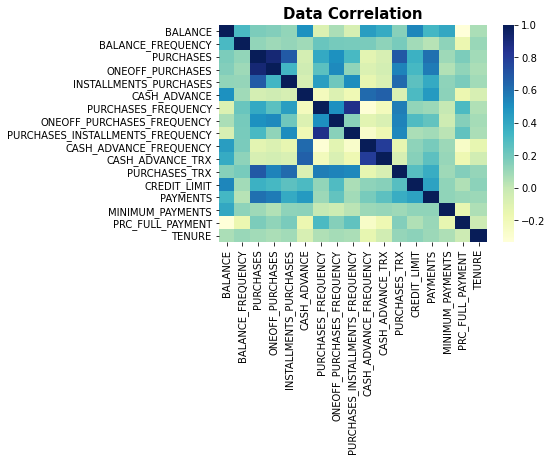

<Figure size 1440x1440 with 0 Axes>

In [9]:
matrix_corr = df.corr()
sns.heatmap(matrix_corr,
            xticklabels = matrix_corr.columns,
            yticklabels = matrix_corr.columns , cmap = 'YlGnBu' )
plt.title('Data Correlation' , size = 15 , weight = 'bold')
plt.figure(figsize=(20,20))

In [11]:
scaler = MinMaxScaler((0,1))
features = df

features = scaler.fit_transform(features)

In [12]:
X = np.matrix(features)

pca = PCA(n_components=3)
pca.fit(X)

components = np.round(pca.explained_variance_ratio_ , 2)
print(components)

[0.5  0.14 0.13]


In [13]:
pca_1 = pca.transform(X)[:,0]
pca_2 = pca.transform(X)[:,1]
pca_3 = pca.transform(X)[:,2]


df['PCA1'] = pca_1
df['PCA2'] = pca_2
df['PCA3'] = pca_3

df = scaler.fit_transform(df)

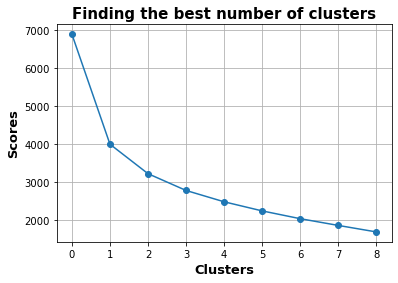

In [14]:
# Elbow Method to find best number of centroids
scores = []

ranges = range(1, 10)

for i in ranges:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df)
  scores.append(kmeans.inertia_) 

plt.plot(scores, '-o')
plt.title('Finding the best number of clusters' , size = 15 , weight = 'bold')
plt.xlabel('Clusters' , size = 13 , weight = 'bold')
plt.ylabel('Scores' ,size = 13 , weight = 'bold')
plt.grid()
plt.show()


In [15]:
# 2 clusters
kmeans = KMeans(n_clusters=2 , random_state=0).fit(df)
labels = kmeans.labels_

No handles with labels found to put in legend.


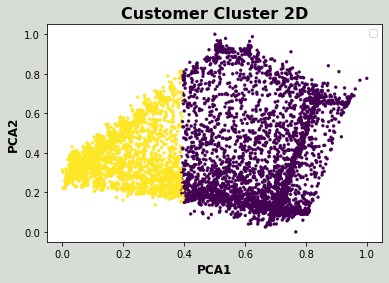

In [26]:
fig = plt.figure()
ax = fig.subplots()

ax.scatter(df[:,17] , df[:,18] , c= labels ,linewidth=0.15 , s =10)

ax.set_xlabel('PCA1' , size = 12 , weight = 'bold')
ax.set_ylabel('PCA2' , size = 12 , weight = 'bold')
ax.set_title('Customer Cluster 2D' , size = 16 , weight = 'bold')
fig.patch.set_facecolor('xkcd:light grey')
ax.legend()
plt.show()

In [ ]:
# 3 clusters
kmeans = KMeans(n_clusters=2 , random_state=0).fit(df)
labels = kmeans.labels_
